In [352]:
import pandas as pd
import numpy as np
from copy import deepcopy
from random import randint 
import random 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, plot_confusion_matrix, roc_auc_score, confusion_matrix
from imblearn.metrics import geometric_mean_score
import sklearn.metrics
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn import metrics
from multi_imbalance.resampling.mdo import MDO

In [71]:
#from orion.contrib.envs import load_env
#load_env()
import boto3
#from orion.sources import S3Source
aws_bucket = 'kilimanjaro-prod-datalake'
s3 = boto3.client('s3')

In [72]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import swim_maha
swim_maha.SwimMaha()

In [6]:
import mahakil_update as mahakil
mahakil.MAHAKIL()

In [7]:
wine_white = pd.read_csv('winequality-white.csv', delimiter=';')
wine_red = pd.read_csv('winequality-red.csv', delimiter=';')

In [8]:
# White Wine Quality Low vs High
WineWLvH = deepcopy(wine_white)
WineWLvH = WineWLvH[(WineWLvH['quality'] <5)| (WineWLvH['quality'] >6)]
WineWLvH.loc[WineWLvH.quality >= 7, "class"] = 0
WineWLvH.loc[WineWLvH.quality <= 4, "class"] = 1
WineWLvH['class'] = WineWLvH['class'].astype("int")
WineWLvH['class'] = WineWLvH['class'].astype("category")
WineWLvH = WineWLvH.drop(columns=['quality'])
print(WineWLvH['class'].value_counts())
WineWLvH.name = 'D10 - Wine_white_LvH'

0    1060
1     183
Name: class, dtype: int64


In [9]:
wine_red['quality'].value_counts().sort_index(ascending=False)

8     18
7    199
6    638
5    681
4     53
3     10
Name: quality, dtype: int64

In [10]:
# Low Quality Red Wine (3,4)
WineT = deepcopy(wine_red)
WineT["class"] = ""
WineT.loc[WineT.quality >= 7, "class"] = 1
WineT.loc[WineT.quality == 6, "class"] = 0
WineT.loc[WineT.quality == 5, "class"] = 0
WineT.loc[WineT.quality <= 4, "class"] = 2
WineT['class'] = WineT['class'].astype("category")
WineT = WineT.drop(columns=['quality'])
WineT.name = 'Wine test'
WineT['class'].value_counts()

0    1319
1     217
2      63
Name: class, dtype: int64

In [53]:
# Low Quality Red Wine (3,4)
WineR3 = deepcopy(wine_red)
WineR3["class"] = ""
WineR3.loc[WineR3.quality >= 8, "class"] = 1
WineR3.loc[((WineR3.quality == 7), "class")] = 0
WineR3.loc[((WineR3.quality == 6), "class")] = 0
WineR3.loc[((WineR3.quality == 5), "class")] = 0
WineR3.loc[WineR3.quality <= 4, "class"] = 2
WineR3['class'] = WineR3['class'].astype("category")
WineR3 = WineR3.drop(columns=['quality'])
WineR3.name = 'Wine red - 3 class'
WineR3['class'].value_counts()

0    1518
2      63
1      18
Name: class, dtype: int64

In [11]:
# Low Quality Red Wine (3,4)
WineRL = deepcopy(wine_red)
WineRL["class"] = ""
WineRL.loc[WineRL.quality >= 5, "class"] = 0
WineRL.loc[WineRL.quality <= 4, "class"] = 1
WineRL['class'] = WineRL['class'].astype("category")
WineRL = WineRL.drop(columns=['quality'])
WineRL.name = 'D11 - Wine_red_low'
WineRL['class'].value_counts()

0    1536
1      63
Name: class, dtype: int64

In [12]:
# Red Wine Quality Low vs High
WineRLvH = deepcopy(wine_red)
WineRLvH = WineRLvH[(WineRLvH['quality'] <5)| (WineRLvH['quality'] >6)]
WineRLvH.loc[WineRLvH.quality >= 7, "class"] = 0
WineRLvH.loc[WineRLvH.quality <= 4, "class"] = 1
WineRLvH['class'] = WineRLvH['class'].astype("int")
WineRLvH['class'] = WineRLvH['class'].astype("category")
WineRLvH = WineRLvH.drop(columns=['quality'])
print(WineRLvH['class'].value_counts())
WineRLvH.name ='D12 - Wine_red_LvH'

0    217
1     63
Name: class, dtype: int64


In [13]:
vowel = pd.read_csv('vowel_data.data', header=None)

In [14]:
vowel = vowel.drop(columns=[10])
vowel = vowel.dropna()
cols_to_check = [0,9]
vowel[cols_to_check] = vowel[cols_to_check].replace({'{':''}, regex=True)
vowel[cols_to_check] = vowel[cols_to_check].replace({'}':''}, regex=True)
vowel = vowel.reset_index(drop=True)
vowel[9] = pd.to_numeric(vowel[9])
vowel = vowel.apply(pd.to_numeric)

In [15]:
speakers = ['Andrew', 'Bill', 'David', 'Mark', 'Jo', 'Kate', 'Penny', 'Rose', 'Mike', 'Nick', 'Rich', 'Tim', 'Sarah', 'Sue', 'Wendy']
words = ['hid', 'hId', 'hEd', 'hAd', 'hYd', 'had', 'hOd', 'hod', 'hUd', 'hud', 'hed']
segments = [0,1,2,3,4,5]
speakers_1 = []
words_1 = []
segment = []
for s in speakers:
  for se in segments:
    for w in words:
      speakers_1.append(s)
      segment.append(se)
      words_1.append(w)

In [16]:
vowel['word'] = np.arange(len(vowel))
vowel['speaker'] = np.arange(len(vowel))
vowel['segment'] = np.arange(len(vowel))
for l in range(len(vowel)):
  vowel['speaker'] = vowel['speaker'].replace(l, speakers_1[l])
  vowel['word'] = vowel['word'].replace(l, words_1[l])
  vowel['segment'] = vowel['segment'].replace(l, segment[l])

In [17]:
vowel['class']= ''
# Vowel 0 
vowel_0 = deepcopy(vowel)
vowel_0.loc[vowel_0.word != 'hid', "class"] = 0
vowel_0.loc[vowel_0.word == 'hid', "class"] = 1
vowel_0['class'] = vowel_0['class'].astype("int")
vowel_0['class'] = vowel_0['class'].astype("category")
vowel_0 = vowel_0.drop(columns=['word','speaker','segment'])
print(vowel_0['class'].value_counts())
vowel_0.name = 'D3 - Vowel_0'

0    900
1     90
Name: class, dtype: int64


In [18]:
vowel_0.head()

,0,1,2,3,4,5,6,7,8,9,class
0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,1
1,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,0
2,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,0
3,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,0
4,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,0


In [19]:
# Vowel 2
vowel_2 = deepcopy(vowel)
vowel_2.loc[vowel_2.word != 'hEd', "class"] = 0
vowel_2.loc[vowel_2.word == 'hEd', "class"] = 1
vowel_2['class'] = vowel_2['class'].astype("int")
vowel_2['class'] = vowel_2['class'].astype("category")
vowel_2 = vowel_2.drop(columns=['word','speaker','segment'])
print(vowel_2['class'].value_counts())
vowel_2.name = 'D4 - Vowel_2'

0    900
1     90
Name: class, dtype: int64


In [20]:
object_ = 'masters/datascience/emma/retail.csv'
retail = s3.get_object(Bucket=aws_bucket, Key=object_)
retail = pd.read_csv(retail['Body'], index_col=0)

In [21]:
retail = pd.read_csv('cust_summary_clustered.csv', index_col=0)

In [22]:
retail = retail.rename(columns={'cluster':'class'})
retail.head(1)

,firstorder_grosssales,firstorder_units,class,loyaltyaccount_No,loyaltyaccount_Yes,gender_female,gender_male,gender_unknown,shipcountry_Albania,shipcountry_Armenia,...,category_Childrens,category_Infant,category_Junior,category_Mens,category_Miscellaneous,category_Nursery,category_Womens,divisioncode_ACCESSORY,divisioncode_APPAREL,divisioncode_FOOTWEAR
0,64.82,2,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [23]:
retail['class'] = retail['class'].replace({2: 1, 1: 2})

In [24]:
print(retail['class'].value_counts())

0    1932069
1     249970
2      22834
Name: class, dtype: int64


In [25]:
retail['class'].value_counts(normalize=True)

0    0.876272
1    0.113372
2    0.010356
Name: class, dtype: float64

In [26]:
retail.name = 'Retail - main'

In [27]:
print((retail['class'].value_counts()*0.10).astype('int64').to_frame())

    class
0  193206
1   24997
2    2283


In [28]:
retail_down = (retail['class'].value_counts()*0.10).to_frame()

In [29]:
retail_0 = retail[(retail['class'] == 0)] 
retail_0 = retail_0.sample(n= 193206)
retail_1 = retail[(retail['class'] == 1)] 
retail_1 = retail_1.sample(n= 24997)
retail_2 = retail[(retail['class'] == 2)] 
retail_2 = retail_2.sample(n= 2283)

In [30]:
retail_down = pd.concat([retail_0, retail_1, retail_2])
retail_down = shuffle(retail_down)
retail_down.name = 'Retail - sample'
retail_down['class'].value_counts(normalize=True)

0    0.876273
1    0.113372
2    0.010354
Name: class, dtype: float64

In [31]:
retail_down = shuffle(retail_down)

In [32]:
retail_down['class'].value_counts(normalize=True)

0    0.876273
1    0.113372
2    0.010354
Name: class, dtype: float64

In [33]:
retail_down.name = 'Retail - sample'

In [34]:
# train test/ scaling
def data_prep (data, seed):
  X= data.drop('class',axis=1).copy()
  y = data['class'].copy()
  y = y.astype('category')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed, shuffle=y, stratify=y) # add ssed

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
  X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

  return X_train_scaled, X_test_scaled, y_train, y_test

In [35]:
# random undersamping imbalance levels (high (5%), extreme (1%), absolute (6 samples)
def random_under_minority (data, imbalance_level, seed):
    
    random.seed(seed)
    
    if imbalance_level == 'none':
        X_train_scaled, X_test_scaled, y_train, y_test = data_prep(data, seed)
    
    else:
        X_train_scaled, X_test_scaled, y_train, y_test = data_prep(data, seed)
        y_train = y_train.reset_index(drop=True)
        X_train_scaled['class'] = y_train

        class_counts = X_train_scaled['class'].value_counts().to_frame()
        maj_count = class_counts.iloc[0,0]
        min_count = class_counts.iloc[1,0]

        majority = X_train_scaled[(X_train_scaled['class'] == 0)]
        minority = X_train_scaled[(X_train_scaled['class']== 1)]

        if imbalance_level == 'absolute':
            downsample = 6
  
        else:
            if imbalance_level == 'high':
                imbalance = 0.05
      
            elif imbalance_level == 'extreme':
                imbalance = 0.01

        downsample = (maj_count * imbalance).round().astype('int')
    
        if imbalance_level == 'extreme' and downsample < 8:
            downsample = 8
 
        if downsample >= min_count:
            minority_sample = minority
      
        else:
            minority_sample = minority.sample(n= downsample)

        final = pd.concat([majority, minority_sample])
        final = shuffle(final)

        X_train_scaled = final.drop('class',axis=1).copy()
        y_train = final['class'].copy()
        y_train = y_train.astype('category')

    X_train_scaled = X_train_scaled.reset_index(drop=True)
    X_test_scaled = X_test_scaled.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [38]:
def SMOTE_sampling(X_train_scaled, X_test_scaled, y_train, y_test):
  
  ## X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  SMOTE_sample= SMOTE()
  X_train_scaled, y_train = SMOTE_sample.fit_resample(X_train_scaled, y_train)
  
  return X_train_scaled, X_test_scaled, y_train, y_test

In [68]:
def SWIM_sampling (X_train_scaled, X_test_scaled, y_train, y_test):
  ##X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)
  X_train_scaled = X_train_scaled.values
  y_train = y_train.values

  numSamples = np.sum(y_train==0)-np.sum(y_train==1)
  sw = swim_maha.SwimMaha(sd= 2)
  X_train_scaled, y_train = sw.mahaSampling(X_train_scaled, y_train, numSamples)
  
  return X_train_scaled, X_test_scaled, y_train, y_test

In [40]:
def MAHAKIL_sampling (X_train_scaled, X_test_scaled, y_train, y_test):
  ## X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  mk = mahakil.MAHAKIL(pfp=0.5)
    
  X_train_scaled, y_train = mk.fit_sample(X_train_scaled, y_train)

  maj_count = np.count_nonzero(y_train ==0)

  df = pd.DataFrame(X_train_scaled)
  df['class'] = y_train
  df['class'] = df['class'].astype(int)

  majority = df[(df['class'] == 0)]
  class_1 = df[(df['class']== 1)]
  class_2 = df[(df['class']== 2)]

  class_1 = class_1[0:maj_count]
  class_2 = class_2[0:maj_count]

  final = pd.concat([majority, class_1, class_2])
  final = shuffle(final)

  X_train_scaled = final.drop('class',axis=1).copy()
  y_train = final['class'].copy()
  y_train = y_train.astype('category')
  
  X_train_scaled = X_train_scaled
  X_test_scaled = X_test_scaled
  y_train = y_train.reset_index(drop=True)
  y_test = y_test.reset_index(drop=True)

  return X_train_scaled, X_test_scaled, y_train, y_test

In [41]:
def MAHAKIL_sampling (X_train_scaled, X_test_scaled, y_train, y_test):
  ## X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  mk = mahakil.MAHAKIL(pfp=0.5)
    
  X_train_scaled, y_train = mk.fit_sample(X_train_scaled, y_train)

  return X_train_scaled, X_test_scaled, y_train, y_test

In [353]:
def MDO_sampling(X_train_scaled, X_test_scaled, y_train, y_test, num_classes):
    
    mdo = MDO(k=9, k1_frac=0, seed=0, maj_int_min= {'maj': 0, 'min':list(range(1,num_classes))})
    X_train_scaled, y_train = mdo._fit_resample(X_train_scaled, y_train)
    return X_train_scaled, X_test_scaled, y_train, y_test

In [42]:
def classifier_results (data, imbalance, sampling_method, model, seed):
  
  if sampling_method == 'none':
    X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  if sampling_method == 'SMOTE':
    X_train_scaled, X_test_scaled, y_train, y_test = SMOTE_sampling (data, imbalance, seed)
  
  if sampling_method == 'SWIM':
    X_train_scaled, X_test_scaled, y_train, y_test = SWIM_sampling (data, imbalance, seed)
  
  if sampling_method == 'MAHAKIL':
    X_train_scaled, X_test_scaled, y_train, y_test = MAHAKIL_sampling(data, imbalance, seed)

  if model == 'naive_bayes':
    model_func = GaussianNB()

  elif model == 'K_neighbours':
    model_func = KNeighborsClassifier(n_neighbors=3)
  
  elif model == 'Random_forest':
    model_func = RandomForestClassifier()

  model_base = model_func
  model_base.fit(X_train_scaled, y_train)

  y_pred = model_base.predict(X_test_scaled)

  score_f1 = f1_score(y_test, y_pred, average="macro")
  ## AUC = roc_auc_score(y_test, y_pred, multi_class="ovr")
  ## GMS = geometric_mean_score(y_test, y_pred, average =='multiclass')

  return [data.name, sampling_method, model, imbalance, score_f1]

In [43]:
def classifier_results (data, imbalance, sampling_method, model, seed):
  
  if sampling_method == 'none':
    X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  if sampling_method == 'SMOTE':
    X_train_scaled, X_test_scaled, y_train, y_test = SMOTE_sampling (data, imbalance, seed)
  
  if sampling_method == 'SWIM':
    X_train_scaled, X_test_scaled, y_train, y_test = SWIM_sampling (data, imbalance, seed)
  
  if sampling_method == 'MAHAKIL':
    X_train_scaled, X_test_scaled, y_train, y_test = MAHAKIL_sampling(data, imbalance, seed)

  if model == 'naive_bayes':
    model_func = GaussianNB()

  elif model == 'K_neighbours':
    model_func = KNeighborsClassifier(n_neighbors=3)
  
  elif model == 'Random_forest':
    model_func = RandomForestClassifier()

  model_base = model_func
  model_base.fit(X_train_scaled, y_train)

  y_pred = model_base.predict(X_test_scaled)
  print(y_pred)

  score_f1 = f1_score(y_test, y_pred, average="macro")
  conf =sklearn.metrics.confusion_matrix(y_test, y_pred)

  return [data.name, score_f1, conf]


In [44]:
X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(WineT, 'none', 3)

In [45]:
y_train.value_counts()

0    989
1    163
2     47
Name: class, dtype: int64

In [49]:
results

['Wine test',
 0.5067474794707226,
 array([[272,  48,  10],
        [ 18,  36,   0],
        [ 13,   1,   2]])]

In [ ]:
all_results = []
datasets = ['retail']
imbalance = ['none']
sampling_method = ['none']
models = ['naive_bayes']
for data in datasets:
  for i in imbalance: 
    for s in sampling_method:
      for m in models:
        for seed in range(2):
            print(seed)
            try:
                results = classifier_results (data, i, s, m, seed) 
                print(results)
            except:
                pass

df = pd.DataFrame(all_results, columns=['Data', 'Sampling_method','Model', 'Imbalance_level', 'F1', 'AUC', 'G_mean'])   
df.to_csv('retail_results.csv')
df

In [124]:
retail = df.copy(deep=True)
retail = retail.groupby(
   ['Data', 'Sampling_method','Imbalance_level']
).agg(
    {  
         'F1': "mean",  
         'AUC': 'mean',
         'G_mean': "mean",  
    }
).round(decimals=3)
retail = retail.reset_index()
retail = retail.sort_values(by=['Data', 'Imbalance_level'])
retail

,Data,Sampling_method,Imbalance_level,F1,AUC,G_mean
0,Retail Data -1,MAHAKIL,absolute,0.344,0.518,0.484
3,Retail Data -1,SMOTE,absolute,0.395,0.564,0.540
6,Retail Data -1,SWIM,absolute,0.444,0.554,0.538
9,Retail Data -1,none,absolute,0.410,0.528,0.507
1,Retail Data -1,MAHAKIL,extreme,0.117,0.503,0.129
4,Retail Data -1,SMOTE,extreme,0.113,0.502,0.113
7,Retail Data -1,SWIM,extreme,0.109,0.501,0.092
10,Retail Data -1,none,extreme,0.115,0.503,0.119
2,Retail Data -1,MAHAKIL,high,0.119,0.503,0.134
5,Retail Data -1,SMOTE,high,0.114,0.503,0.117


In [131]:
comp_results = pd.read_csv('Comparison_results.csv', delimiter=',', index_col=0)
comp_results

,Data,Sampling_method,Model,Imbalance_level,F1,AUC,G_mean
0,D3 - Vowel_0,None,naive_bayes,High,0.941241,0.949855,0.949141
1,D3 - Vowel_0,None,naive_bayes,High,0.907738,0.923671,0.922085
2,D3 - Vowel_0,None,naive_bayes,High,0.811693,0.879710,0.878074
3,D3 - Vowel_0,None,naive_bayes,High,0.852806,0.873527,0.868782
4,D3 - Vowel_0,None,naive_bayes,High,0.870729,0.877971,0.872777
...,...,...,...,...,...,...,...
7088,D12 - Wine_red_LvH,MAHAKIL,XGBoost,Absolute,0.676425,0.646991,0.553817
7089,D12 - Wine_red_LvH,MAHAKIL,XGBoost,Absolute,0.716599,0.690972,0.642802
7090,D12 - Wine_red_LvH,MAHAKIL,XGBoost,Absolute,0.713861,0.678241,0.606676
7091,D12 - Wine_red_LvH,MAHAKIL,XGBoost,Absolute,0.793510,0.762731,0.735980


In [133]:
comp_results = comp_results.copy(deep=True)
comp = comp_results.groupby(
   ['Data','Sampling_method','Imbalance_level']
).agg(
    {  
         'F1': "mean",  
         'AUC': 'mean',
         'G_mean': "mean",  
    }
).round(decimals=3)
comp = comp.reset_index()
comp

,Data,Sampling_method,Imbalance_level,F1,AUC,G_mean
0,D10 - Wine_white_LvH,MAHAKIL,Absolute,0.614,0.597,0.424
1,D10 - Wine_white_LvH,MAHAKIL,Extreme,0.644,0.623,0.487
2,D10 - Wine_white_LvH,MAHAKIL,High,0.796,0.781,0.758
3,D10 - Wine_white_LvH,None,Absolute,0.527,0.538,0.220
4,D10 - Wine_white_LvH,None,Extreme,0.550,0.553,0.273
5,D10 - Wine_white_LvH,None,High,0.738,0.689,0.614
6,D10 - Wine_white_LvH,SMOTE,Absolute,0.647,0.622,0.491
7,D10 - Wine_white_LvH,SMOTE,Extreme,0.678,0.649,0.551
8,D10 - Wine_white_LvH,SMOTE,High,0.806,0.799,0.782
9,D10 - Wine_white_LvH,SWIM,Absolute,0.760,0.752,0.722


In [229]:
X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(vowel_0, 'high', 3)

In [139]:
type(X_train_scaled)

pandas.core.frame.DataFrame

In [140]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
704    0
705    0
706    0
707    0
708    0
Name: class, Length: 709, dtype: category
Categories (2, int64): [0, 1]

In [406]:
vowel_0_train = pd.DataFrame(X_train_scaled)
vowel_0_train['class']=y_train

In [407]:
vowel_0_train['class'].value_counts()

0    675
1     34
Name: class, dtype: int64

In [45]:
vowel_0_new = pd.read_csv('vowel0_train_DADO.csv', index_col=0)
vowel_0_new = vowel_0_new.drop(columns='X')
vowel_0_new.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,class
1,-0.037630,0.484498,-0.375912,-0.202011,0.320097,-0.330858,-0.544283,-0.130069,-0.389940,0.108431,0
2,0.372194,0.689095,-0.908689,-0.574644,0.607080,0.092406,0.373586,-1.240069,-1.017963,1.470485,0
3,0.803400,0.232556,-0.650757,-0.381813,-0.799438,-0.408429,-0.146965,0.732302,-0.545633,-0.234999,0
4,-0.683845,1.512556,0.473993,1.373210,-1.788933,-1.676536,-1.205064,1.895984,1.032298,-0.073287,0
5,2.152849,-1.403376,-0.897413,-1.030664,-0.131304,1.053605,0.679542,0.997248,1.000809,-0.538419,0


In [215]:
X_train_scaled = deepcopy(vowel_0_new.iloc[:701,:-1])

In [216]:
y_train = deepcopy(vowel_0_new.iloc[:701,-1:])
y_train = y_train.squeeze(axis=1)
y_train

1      0
2      0
3      0
4      0
5      0
      ..
697    0
698    0
699    0
700    0
701    0
Name: class, Length: 701, dtype: int64

In [217]:
#Call the PCA function with eight components
pca = PCA(n_components =9)
#Fit and transform the data
pca.fit(X_train_scaled)
x_new = pca.fit_transform(X_train_scaled)

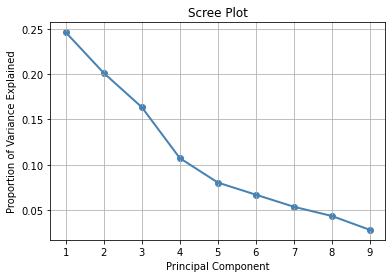

In [218]:
#Scree plot, the amount of variance explained by each component 
PC_values = np.arange(pca.n_components_) + 1
plt.scatter(PC_values, pca.explained_variance_ratio_,color='steelblue')
plt.plot(PC_values, pca.explained_variance_ratio_, linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()

In [219]:
pca = PCA(n_components =2)
#Fit and transform the data
pca.fit(X_train_scaled)
pc_comps = pca.fit_transform(X_train_scaled)
principalDf = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
y_train = y_train.reset_index(drop=True)
principalDf['class'] = y_train

In [220]:
principalDf = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
y_train = y_train.reset_index(drop=True)
principalDf['class'] = y_train

In [221]:
X = principalDf

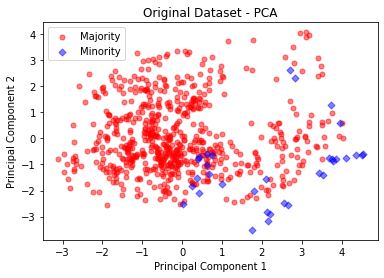

In [222]:
plt.scatter(X['PC 1'][(X['class'] == 0)],
            X['PC 2'][(X['class'] == 0)],
           marker='o',
           color='red',
           label='Majority',
           s = 5**2, alpha=0.5)
plt.scatter(X['PC 1'][(X['class'] == 1)],
            X['PC 2'][(X['class'] == 1)],
           marker='D',
           color='blue',
           label='Minority',
           s = 5**2, alpha=0.5)
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Original Dataset - PCA')
plt.show()


In [344]:
X_train_scaledwine, X_test_scaledwine, y_trainwine, y_testwine = random_under_minority(WineT, 'none', 3)

In [345]:
len(X_train_scaledwine)

1199

In [56]:
def PCA_plots(X_train_scaled, y_train, title):
    pca = PCA(n_components =2)
    #Fit and transform the data
    pca.fit(X_train_scaled)
    pc_comps = pca.fit_transform(X_train_scaled)
    
    X = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
    X['class'] = y_train
    X['class'] = X['class'].replace({0: 'majority', 1: 'minority1', 2: 'minority2'})
    X.loc[1199:,'class'] = X.loc[1199:]['class'].replace('minority1', 'minority_new1')
    X.loc[1199:,'class'] = X.loc[1199:]['class'].replace('minority2', 'minority_new2')
    
    plt.figure(figsize=(7,5))
    
    plt.scatter(X['PC 1'][(X['class'] == 'majority')],
            X['PC 2'][(X['class'] == 'majority')],
           marker='o',
           color='red',
           label='Majority',
           s = 5**2, alpha=0.5)
    plt.scatter(X['PC 1'][(X['class'] == 'minority1')],
            X['PC 2'][(X['class'] == 'minority1')],
           marker='D',
           color='blue',
           label='Minority 1',
           s = 5**2)
    plt.scatter(X['PC 1'][(X['class'] == 'minority_new1')],
            X['PC 2'][(X['class'] == 'minority_new1')],
           marker='D',
           color='blue',
           label='Minority 1 - new',
           s = 5**2, alpha=0.2)
    plt.scatter(X['PC 1'][(X['class'] == 'minority1')],
            X['PC 2'][(X['class'] == 'minority1')],
           marker='D',
           color='green',
           label='Minority 2',
           s = 5**2)
    plt.scatter(X['PC 1'][(X['class'] == 'minority_new2')],
            X['PC 2'][(X['class'] == 'minority_new2')],
           marker='D',
           color='green',
           label='Minority 2 - new',
           s = 5**2, alpha=0.2)
    plt.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f" Minority Oversampling - {title}")
    plt.show()

In [366]:
def PCA_plots(X_train_scaled, y_train, title):
    pca = PCA(n_components =2)
    #Fit and transform the data
    pca.fit(X_train_scaled)
    pc_comps = pca.fit_transform(X_train_scaled)
    
    X = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
    X['class'] = y_train
    X['class'] = X['class'].replace({0: 'majority', 1: 'minority'})
    X.loc[1199:,'class'] = X.loc[1199:]['class'].replace('minority', 'minority_new')
    
    plt.figure(figsize=(7,5))
    
    plt.scatter(X['PC 1'][(X['class'] == 'majority')],
            X['PC 2'][(X['class'] == 'majority')],
           marker='o',
           color='red',
           label='Majority',
           s = 5**2, alpha=0.5)
    plt.scatter(X['PC 1'][(X['class'] == 'minority')],
            X['PC 2'][(X['class'] == 'minority')],
           marker='D',
           color='blue',
           label='Minority',
           s = 5**2)
    plt.scatter(X['PC 1'][(X['class'] == 'minority_new')],
            X['PC 2'][(X['class'] == 'minority_new')],
           marker='D',
           color='blue',
           label='Minority - new',
           s = 5**2, alpha=0.2)
    plt.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f" Minority Oversampling - {title}")
    plt.show()

In [347]:
X_train_scaledwine, X_test_scaledwine, y_trainwine, y_testwine =  random_under_minority(WineRL, 'none', 1)

In [357]:
X_train_scaledwine = X_train_scaledwine.values
y_trainwine = y_trainwine.values

In [361]:
len(X_train_scaledwine)

1199

In [360]:
pd.DataFrame(y_trainsmw).value_counts()

0    1152
1    1152
dtype: int64

In [359]:
len(X_train_scaledwine)

1199

In [364]:
pca = PCA(n_components =2)
    #Fit and transform the data
pca.fit(X_train_scaledsmw)
pc_comps = pca.fit_transform(X_train_scaledsmw)
    
X = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
X['class'] = y_trainsmw
X['class'] = X['class'].replace({0: 'majority', 1: 'minority1'})

In [365]:
X['class'].value_counts()

majority     1152
minority1    1152
Name: class, dtype: int64

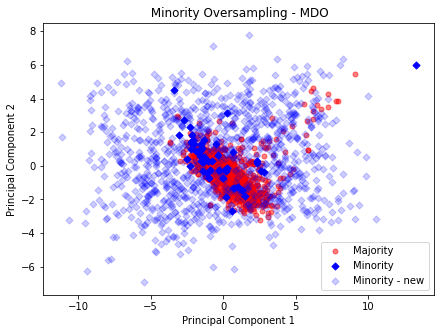

In [368]:
X_train_scaledsmw, X_test_scaledsmw, y_trainsmw, y_testsmw = MDO_sampling(X_train_scaledwine, X_test_scaledwine, y_trainwine, y_testwine, 2)
PCA_plots(X_train_scaledsmw, y_trainsmw, 'MDO')

In [69]:
X_train_scaledsmw, X_test_scaledsmw, y_trainsmw, y_testsmw = SWIM_sampling(X_train_scaledwine, X_test_scaledwine, y_trainwine, y_testwine)
PCA_plots(X_train_scaledsmw, y_trainsmw, 'SMOTE')

NameError: name 'label' is not defined

In [343]:
pd.DataFrame(y_train).value_counts()

class
0        989
1        163
2         47
dtype: int64

In [355]:
X_train_scaledsw, X_test_scaledsw, y_trainsw, y_testsw = SWIM_sampling(X_train_scaled, X_test_scaled, y_train, y_test)
PCA_plots(X_train_scaledsw, y_trainsw, 'SWIM')

NameError: name 'label' is not defined

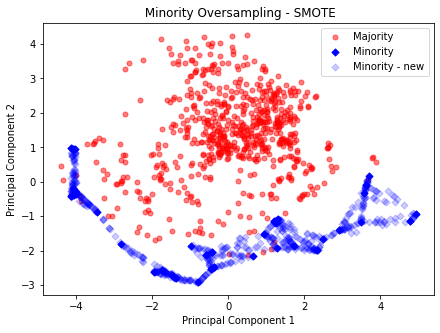

In [230]:
X_train_scaledsm, X_test_scaledsm, y_trainsm, y_testsm = SMOTE_sampling(X_train_scaled, X_test_scaled, y_train, y_test)
PCA_plots(X_train_scaledsm, y_trainsm, 'SMOTE')

sorted data
calculated distance
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
<class 'pandas.core.frame.DataFrame'>


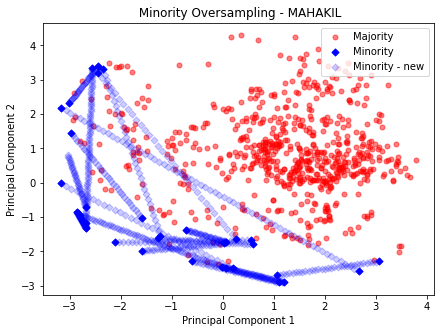

In [150]:
X_train_scaledm, X_test_scaledm, y_trainm, y_testm = MAHAKIL_sampling(X_train_scaled, X_test_scaled, y_train, y_test)
PCA_plots(X_train_scaledm, y_trainm, 'MAHAKIL')

In [114]:
X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(retail_down, 'none', 1)

In [115]:
pca = PCA(n_components =2)
#Fit and transform the data
pca.fit(X_train_scaled)
pc_comps = pca.fit_transform(X_train_scaled)

In [116]:
principalDf = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
y_train = y_train.reset_index(drop=True)
principalDf['class'] = y_train

In [117]:
X = principalDf

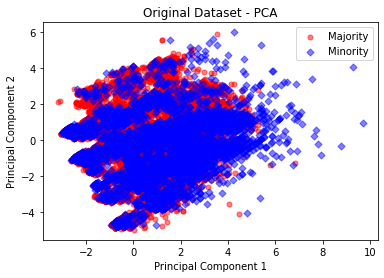

In [118]:
plt.scatter(X['PC 1'][(X['class'] == 0)],
            X['PC 2'][(X['class'] == 0)],
           marker='o',
           color='red',
           label='Majority',
           s = 5**2, alpha=0.5)
plt.scatter(X['PC 1'][(X['class'] == 1)],
            X['PC 2'][(X['class'] == 1)],
           marker='D',
           color='blue',
           label='Minority',
           s = 5**2, alpha=0.5)
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Original Dataset - PCA')
plt.show()

In [124]:
vowel_train = pd.read_csv('X_train_vowel0.csv', index_col=0)
vowel_train.head(2)

,0,1,2,3,4,5,6,7,8,9,class
0,-0.416702,-0.965515,0.224203,1.676940,1.328405,1.724087,-0.240285,-0.626967,-2.057090,0.119274,0
1,0.851737,0.909764,-1.151627,-1.211487,1.006896,0.323311,-0.049472,0.001350,0.766831,-1.135955,0


In [128]:
len(vowel_train)

709

In [125]:
from io import StringIO  
csv_buffer = StringIO()
vowel_train.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('kilimanjaro-prod-datalake','masters/datascience/emma/vowel0_train.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'DZGR36AGMKDAR12T',
  'HostId': 'moTPSt+EbgWra3q1UQg42fkPAr6ItSUFRuYNYV7SuTDTLPcitNuS3qXCMM1avrEGdfsYMdElBJg=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'moTPSt+EbgWra3q1UQg42fkPAr6ItSUFRuYNYV7SuTDTLPcitNuS3qXCMM1avrEGdfsYMdElBJg=',
   'x-amz-request-id': 'DZGR36AGMKDAR12T',
   'date': 'Mon, 26 Jul 2021 17:45:30 GMT',
   'x-amz-version-id': 'I4_BMA7sfPh4rfS_h5_pXKGwdlIRmnyS',
   'x-amz-server-side-encryption': 'aws:kms',
   'x-amz-server-side-encryption-aws-kms-key-id': 'arn:aws:kms:eu-west-1:794236216820:key/68512d48-1991-4929-91a2-1892476cd145',
   'etag': '"8ee84de702c205bab08480a4ec954a14"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 1},
 'ETag': '"8ee84de702c205bab08480a4ec954a14"',
 'ServerSideEncryption': 'aws:kms',
 'VersionId': 'I4_BMA7sfPh4rfS_h5_pXKGwdlIRmnyS',
 'SSEKMSKeyId': 'arn:aws:kms:eu-west-1:794236216820:key/68512d48-1991-4929-91a2-1892476cd145'}

In [419]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,class
0,0.324678,0.756730,-1.160983,-0.238493,-0.709756,1.249217,0.299221,-1.186387,-0.659342,0.913660,0
1,0.356751,0.225792,-1.124337,-0.198102,-0.098421,-0.098147,0.124996,0.233582,-0.708325,-0.346698,0
2,1.678879,-0.197774,-0.247651,1.271583,-1.090905,0.139623,-0.499665,1.516748,0.045653,0.465199,0
3,-0.607820,0.931737,-0.368865,-1.249553,-0.537864,-0.706906,1.603785,1.009369,-2.296752,0.305154,0
4,-0.557928,-0.363481,-0.000995,-0.136866,0.731141,-0.745691,0.526564,1.232754,-0.972479,-0.588433,0
...,...,...,...,...,...,...,...,...,...,...,...
704,-1.281357,-0.544406,0.572656,1.013606,0.645942,-1.275194,-0.578278,-1.350895,0.010666,1.243754,0
705,-1.465480,1.843124,-0.444976,-1.808503,1.423189,-0.150423,0.114373,-0.303236,-2.195288,0.053416,0
706,-0.548425,-1.832015,1.073015,1.404480,1.728109,1.269453,-1.812727,-1.778618,0.192600,1.037028,1
707,0.224895,0.761803,-0.295573,-1.176590,-0.497507,0.492063,1.461431,0.638792,-0.543884,0.003402,0


In [82]:
vowel_dado = pd.read_csv('vowel0_train_DADO.csv', index_col=0)
vowel_dado = vowel_dado.drop(columns=['X'])
vowel_dado.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,class
1,-0.037630,0.484498,-0.375912,-0.202011,0.320097,-0.330858,-0.544283,-0.130069,-0.389940,0.108431,0
2,0.372194,0.689095,-0.908689,-0.574644,0.607080,0.092406,0.373586,-1.240069,-1.017963,1.470485,0
3,0.803400,0.232556,-0.650757,-0.381813,-0.799438,-0.408429,-0.146965,0.732302,-0.545633,-0.234999,0
4,-0.683845,1.512556,0.473993,1.373210,-1.788933,-1.676536,-1.205064,1.895984,1.032298,-0.073287,0
5,2.152849,-1.403376,-0.897413,-1.030664,-0.131304,1.053605,0.679542,0.997248,1.000809,-0.538419,0


In [107]:
X_train_scaled_dado = deepcopy(vowel_dado.iloc[:,:-1])
X_train_scaled_dado

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
1,-0.037630,0.484498,-0.375912,-0.202011,0.320097,-0.330858,-0.544283,-0.130069,-0.389940,0.108431
2,0.372194,0.689095,-0.908689,-0.574644,0.607080,0.092406,0.373586,-1.240069,-1.017963,1.470485
3,0.803400,0.232556,-0.650757,-0.381813,-0.799438,-0.408429,-0.146965,0.732302,-0.545633,-0.234999
4,-0.683845,1.512556,0.473993,1.373210,-1.788933,-1.676536,-1.205064,1.895984,1.032298,-0.073287
5,2.152849,-1.403376,-0.897413,-1.030664,-0.131304,1.053605,0.679542,0.997248,1.000809,-0.538419
...,...,...,...,...,...,...,...,...,...,...
2212,-0.949303,-1.396797,0.451883,1.528365,1.795150,1.587595,0.459549,-0.619357,-0.621595,-1.367200
2451,-0.415109,-1.229925,0.632981,1.020476,1.157432,0.836943,-0.482648,1.152881,-0.336309,-0.705061
3722,-0.453220,-1.532018,0.615553,0.503173,1.145339,0.623623,-0.729442,0.624954,-0.402070,-0.497620
4410,0.074229,-0.984763,0.400813,0.993314,1.868721,1.088794,-0.306178,-0.262129,-0.392610,-0.588030


In [108]:
y_train_dado = deepcopy(vowel_dado.iloc[:,-1:])

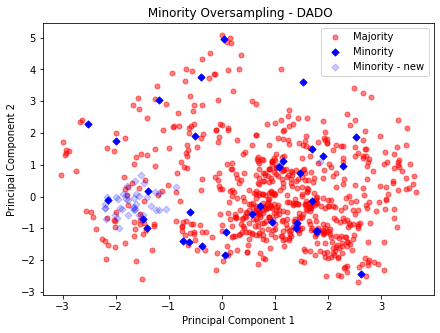

In [151]:
PCA_plots(X_train_scaled_dado, y_train_dado, 'DADO')

In [121]:
vowel_diwo = pd.read_csv('vowel0_train_DIWO.csv', index_col=0)
vowel_diwo = vowel_diwo.drop(columns=['X'])
vowel_diwo.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,class
1,-0.037630,0.484498,-0.375912,-0.202011,0.320097,-0.330858,-0.544283,-0.130069,-0.389940,0.108431,0
2,0.372194,0.689095,-0.908689,-0.574644,0.607080,0.092406,0.373586,-1.240069,-1.017963,1.470485,0
3,0.803400,0.232556,-0.650757,-0.381813,-0.799438,-0.408429,-0.146965,0.732302,-0.545633,-0.234999,0
4,-0.683845,1.512556,0.473993,1.373210,-1.788933,-1.676536,-1.205064,1.895984,1.032298,-0.073287,0
5,2.152849,-1.403376,-0.897413,-1.030664,-0.131304,1.053605,0.679542,0.997248,1.000809,-0.538419,0


In [122]:
len(vowel_diwo)

1321

In [123]:
X_train_scaled_diwo = deepcopy(vowel_diwo.iloc[:,:-1])
y_train_diwo = deepcopy(vowel_diwo.iloc[:,-1:])

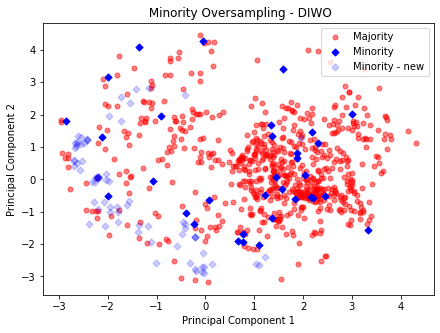

In [152]:
PCA_plots(X_train_scaled_diwo, y_train_diwo, 'DIWO')

In [5]:
from multi_imbalance.resampling.mdo import MDO

# Mahalanbois Distance Oversampling
mdo = MDO(k=9, k1_frac=0, seed=0)

In [6]:
X_train_scaledwine, X_test_scaledwine, y_trainwine, y_testwine = random_under_minority(WineT, 'none', 1)

NameError: name 'random_under_minority' is not defined

In [1]:
mdo = MDO()
mdo

NameError: name 'MDO' is not defined

In [190]:
X_train_resampled, y_train_resampled = mdo.fit_transform(np.copy(X_train_scaled), np.copy(y_train))

AttributeError: 'MDO' object has no attribute 'fit_transform'

In [308]:
full = pd.read_csv('10_seed_update.csv')

In [369]:
full = pd.read_csv('30seedfinal.csv')
full.head()

,Data,Imbalance_level,Sampling_method,Model,F1,MAUC,G_mean
0,Wine white - 3 class,none,none,naive_bayes,0.184659,0.48692,0.561472
1,Wine white - 3 class,none,none,naive_bayes,0.184659,0.48692,0.561472
2,Wine white - 3 class,none,none,naive_bayes,0.184659,0.48692,0.561472
3,Wine white - 3 class,none,none,naive_bayes,0.184659,0.48692,0.561472
4,Wine white - 3 class,none,none,naive_bayes,0.184659,0.48692,0.561472


In [370]:
len(full)

9775

In [371]:
results = full

In [372]:
high = full[full['Imbalance_level']=='high']
ecoli = high[high['Data']=='Ecoli 1']
high_none = ecoli[ecoli['Sampling_method']=='none']
high_SWIM = ecoli[ecoli['Sampling_method']=='SWIM']
high_none_nb = high_none[high_none['Model']=='naive_bayes']
high_SWIM_nb = high_SWIM[high_SWIM['Model']=='naive_bayes']
none = high_none_nb['F1']
SWIM = high_SWIM_nb['F1'].values

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(none, SWIM, method="exact")
p

0.2601466635102124

In [373]:
full['Data'].unique()

array(['Wine white - 3 class', 'Wine red - 3 class', 'Vowel - 3 classes',
       'Heart 1', 'Glass 1', 'Ecoli 1', 'Page 1'], dtype=object)

In [374]:
test = results[(results['Imbalance_level']=='high')&(results['Data']=='Heart 1')&(results['Sampling_method']=='SWIM')&(results['Model']=='naive_bayes')]
test


,Data,Imbalance_level,Sampling_method,Model,F1,MAUC,G_mean
3688,Heart 1,high,SWIM,naive_bayes,0.120199,0.403857,0.397926
3689,Heart 1,high,SWIM,naive_bayes,0.205128,0.271215,0.520075
3690,Heart 1,high,SWIM,naive_bayes,0.122460,0.401691,0.392730
3691,Heart 1,high,SWIM,naive_bayes,0.096737,0.420452,0.356618
3692,Heart 1,high,SWIM,naive_bayes,0.214098,0.416424,0.480298
3693,Heart 1,high,SWIM,naive_bayes,0.152130,0.213697,0.574651
3694,Heart 1,high,SWIM,naive_bayes,0.013158,0.353716,0.315607
3695,Heart 1,high,SWIM,naive_bayes,0.103731,0.325881,0.431622
3696,Heart 1,high,SWIM,naive_bayes,0.166031,0.407061,0.444386
3697,Heart 1,high,SWIM,naive_bayes,0.181249,0.432565,0.433326


In [375]:
from scipy.stats import mannwhitneyu

In [394]:
def mann_whitney (results, d, i, s, m, metric):
    base = results[(results['Imbalance_level']==i)&(results['Data']==d)& (results['Sampling_method']=='none')&(results['Model']==m)]
    test = results[(results['Imbalance_level']==i)&(results['Data']== d)& (results['Sampling_method']== s)&(results['Model']==m)]
    base_array = base[metric].values
    base_mean = np.mean(base_array)
    test_array = test[metric].values
    test_mean = np.mean(test_array)
    if len(base_array) < len(test_array):
        base_array = base_array[:(len(test_array))]
    U1, p = mannwhitneyu(base_array, test_array, method="exact")
    return [d,i,'none',s, m, me, base_mean, test_mean, p]
    

In [395]:
results = mann_whitney(full, 'Heart 1', 'high','SWIM','naive_bayes','F1')
results

['Heart 1',
 'high',
 'none',
 'SWIM',
 'naive_bayes',
 'G_mean',
 0.1812467384666667,
 0.15732576696551726,
 0.1443343854213164]

In [396]:
all_results = []
datasets = ['Ecoli 1', 'Glass 1', 'Heart 1', 'Vowel - 3 classes','Wine red - 3 class', 'Wine red - 5 class', 'Wine white - 3 class',
       'Wine white - 5 class']
imbalance = ['none','extreme']
sampling_method = ['SMOTE', 'MAHAKIL','SWIM', 'MDO']
models = ['naive_bayes','K_neighbours', 'Random_forest']
metrics = ['F1','MAUC','G_mean']
for data in datasets:
  for i in imbalance: 
    for s in sampling_method:
      for m in models:
        for me in metrics:
            try:
                results = mann_whitney (full, data, i, s, m, me)
                all_results.append(results)
            except:
                pass

/home/emmaranderson7/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/emmaranderson7/.local/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [397]:
df = pd.DataFrame(all_results, columns=['Data', 'Imbalance_level','Base','Sampling_method', 'Model','Scoring_metric','base_mean','method_mean', 'P_value'])
df.head()

,Data,Imbalance_level,Base,Sampling_method,Model,Scoring_metric,base_mean,method_mean,P_value
0,Ecoli 1,none,none,SMOTE,naive_bayes,F1,0.493559,0.619050,1.691123e-17
1,Ecoli 1,none,none,SMOTE,naive_bayes,MAUC,0.225336,0.343456,1.691123e-17
2,Ecoli 1,none,none,SMOTE,naive_bayes,G_mean,0.752055,0.806269,1.691123e-17
3,Ecoli 1,none,none,SMOTE,K_neighbours,F1,0.758902,0.678889,1.691123e-17
4,Ecoli 1,none,none,SMOTE,K_neighbours,MAUC,0.408725,0.422286,1.691123e-17


In [320]:
All_percentages = []
sampling_method = ['SMOTE', 'MAHAKIL','SWIM', 'MDO']
for s in sampling_method:
    sample = df[df['Imbalance_level']=='none']
    sample = sample[sample['Sampling_method']==s]
    greater = sample.query('method_mean > base_mean')
    p = greater[greater['P_value']< 0.05]
    percentage = len(p)/len(sample)
    All_percentages.append([s, percentage])

In [321]:
Base_none = All_percentages
Base_none = pd.DataFrame(Base_extreme, columns=['Sampling_method', 'Base']).round(2)
Base_none

,Sampling_method,Base
0,SMOTE,0.75
1,MAHAKIL,0.51
2,SWIM,0.62
3,MDO,0.71


In [322]:
All_percentages = []
sampling_method = ['SMOTE', 'MAHAKIL','SWIM', 'MDO']
for s in sampling_method:
    sample = df[df['Imbalance_level']=='extreme']
    sample = sample[sample['Sampling_method']==s]
    greater = sample.query('method_mean > base_mean')
    p = greater[greater['P_value']< 0.05]
    percentage = len(p)/len(sample)
    All_percentages.append([s, percentage])

In [323]:
Base_extreme = All_percentages
Base_extreme = pd.DataFrame(Base_extreme, columns=['Sampling_method', 'Base']).round(2)
Base_extreme

,Sampling_method,Base
0,SMOTE,0.80
1,MAHAKIL,0.59
2,SWIM,0.63
3,MDO,0.72


In [324]:
def standard_dev(results, d, i, s, m, me):
    test = results[(results['Imbalance_level']==i)&(results['Data']== d)& (results['Sampling_method']== s)&(results['Model']==m)]
    test_array = test[metric].values
    std = np.std(test_array, dtype=np.float64)
    return [d,i,s,m,me,std]

In [325]:
all_results = []
datasets = ['Ecoli 1', 'Glass 1', 'Heart 1', 'Vowel - 3 classes','Wine red - 3 class', 'Wine red - 5 class', 'Wine white - 3 class',
       'Wine white - 5 class']
imbalance = ['none','high','extreme']
sampling_method = ['SMOTE', 'MAHAKIL','SWIM', 'MDO']
models = ['naive_bayes','K_neighbours', 'Random_forest']
metrics = ['F1','MAUC','G_mean']
for data in datasets:
  for i in imbalance: 
    for s in sampling_method:
      for m in models:
        for me in metrics:
            try:
                results = standard_dev(full, data, i, s, m ,me)
                all_results.append(results)
            except:
                pass

/home/emmaranderson7/.local/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/emmaranderson7/.local/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/emmaranderson7/.local/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [326]:
sd_df = pd.DataFrame(all_results, columns=['Data', 'Imbalance_level','Sampling_method', 'Model', 'Metric','SD'])
sd_df.head()

,Data,Imbalance_level,Sampling_method,Model,Metric,SD
0,Ecoli 1,none,SMOTE,naive_bayes,F1,0.192353
1,Ecoli 1,none,SMOTE,naive_bayes,MAUC,0.192353
2,Ecoli 1,none,SMOTE,naive_bayes,G_mean,0.192353
3,Ecoli 1,none,SMOTE,K_neighbours,F1,0.176923
4,Ecoli 1,none,SMOTE,K_neighbours,MAUC,0.176923


In [327]:
# To check bulk sales
SD_group = sd_df.groupby(
   ['Sampling_method','Imbalance_level']
).agg(
    {
         'SD': "mean",
    }
).round(decimals=3)
SD_group= SD_group.reset_index()
SD_group

,Sampling_method,Imbalance_level,SD
0,MAHAKIL,extreme,0.153
1,MAHAKIL,high,0.157
2,MAHAKIL,none,0.159
3,MDO,extreme,0.179
4,MDO,high,0.181
5,MDO,none,0.183
6,SMOTE,extreme,0.178
7,SMOTE,high,0.184
8,SMOTE,none,0.188
9,SWIM,extreme,0.185


In [328]:
SD_none = SD_group[SD_group['Imbalance_level']=='none']
SD_none = SD_none.reset_index(drop=True)
SD_none = SD_none[['Sampling_method', 'SD']]
SD_none

,Sampling_method,SD
0,MAHAKIL,0.159
1,MDO,0.183
2,SMOTE,0.188
3,SWIM,0.196


In [329]:
SD_extreme = SD_group[SD_group['Imbalance_level']=='extreme']
SD_extreme = SD_extreme.reset_index(drop=True)
SD_extreme = SD_extreme[['Sampling_method', 'SD']]
SD_extreme

,Sampling_method,SD
0,MAHAKIL,0.153
1,MDO,0.179
2,SMOTE,0.178
3,SWIM,0.185


In [330]:
def mann_whitney2 (results, d, i, s1, s2, m, metric):
    base = results[(results['Imbalance_level']==i)&(results['Data']==d)& (results['Sampling_method']==s1)&(results['Model']==m)]
    test = results[(results['Imbalance_level']==i)&(results['Data']== d)& (results['Sampling_method']== s2)&(results['Model']==m)]
    base_array = base[metric].values
    base_mean = np.mean(base_array)
    test_array = test[metric].values
    test_mean = np.mean(test_array)
    if len(base_array) < len(test_array):
        base_array = base_array[:(len(test_array))]
    if len(test_array) < len(base_array):
         test_array = test_array[:(len(base_array))]
    U1, p = mannwhitneyu(base_array, test_array, method="exact")
    return [d,i,s1,s2,m,base_mean,test_mean,p]

In [331]:
all_results = []
datasets = ['Ecoli 1', 'Glass 1', 'Heart 1', 'Vowel - 3 classes','Wine red - 3 class', 'Wine red - 5 class', 'Wine white - 3 class',
       'Wine white - 5 class']
imbalance = ['none','high','extreme']
sampling_method = ['SMOTE', 'MAHAKIL','SWIM', 'MDO']
sampling_method2 = ['SMOTE', 'MAHAKIL','SWIM', 'MDO']
models = ['naive_bayes','K_neighbours', 'Random_forest']
metrics = ['F1','MAUC','G_mean']
for data in datasets:
  for i in imbalance: 
    for s1 in sampling_method:
        for s2 in sampling_method:
            for m in models:
                for me in metrics:
                    if s1 == s2:
                        continue
                    try:
                        results = mann_whitney2(full, data, i, s1, s2, m, me)
                        all_results.append(results)
                    except:
                        pass

/home/emmaranderson7/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/emmaranderson7/.local/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [332]:
df = pd.DataFrame(all_results, columns=['Data', 'Imbalance_level','Sampling_method_1', 'Sampling_method_2','Model','Method1_mean','Method2_mean', 'P_value'])
df.head()

,Data,Imbalance_level,Sampling_method_1,Sampling_method_2,Model,Method1_mean,Method2_mean,P_value
0,Ecoli 1,none,SMOTE,MAHAKIL,naive_bayes,0.619050,0.569553,1.713893e-07
1,Ecoli 1,none,SMOTE,MAHAKIL,naive_bayes,0.343456,0.704506,1.691123e-17
2,Ecoli 1,none,SMOTE,MAHAKIL,naive_bayes,0.806269,0.704506,1.691123e-17
3,Ecoli 1,none,SMOTE,MAHAKIL,K_neighbours,0.678889,0.623501,1.825377e-11
4,Ecoli 1,none,SMOTE,MAHAKIL,K_neighbours,0.422286,0.754601,1.691123e-17


In [333]:
All_percentages = []
sampling_method = ['SMOTE', 'MAHAKIL','SWIM', 'MDO']
for s in sampling_method:
    sample = df[df['Imbalance_level']=='none']
    sample = sample[sample['Sampling_method_2']==s]
    greater = sample.query('Method2_mean > Method1_mean')
    p = greater[greater['P_value']< 0.05]
    percentage = len(p)/len(sample)
    All_percentages.append([s, percentage])

In [334]:
Alternatives_none = All_percentages
Alternatives_none = pd.DataFrame(Alternatives_none, columns=['Sampling_method', 'ALTS']).round(2)
Alternatives_none 

,Sampling_method,ALTS
0,SMOTE,0.68
1,MAHAKIL,0.25
2,SWIM,0.46
3,MDO,0.41


In [335]:
All_percentages = []
sampling_method = ['SMOTE', 'MAHAKIL','SWIM', 'MDO']
for s in sampling_method:
    sample = df[df['Imbalance_level']=='extreme']
    sample = sample[sample['Sampling_method_2']==s]
    greater = sample.query('Method2_mean > Method1_mean')
    p = greater[greater['P_value']< 0.05]
    percentage = len(p)/len(sample)
    All_percentages.append([s, percentage])

In [336]:
Alternatives_extreme = All_percentages
Alternatives_extreme = pd.DataFrame(Alternatives_extreme, columns=['Sampling_method', 'ALTS']).round(2)
Alternatives_extreme

,Sampling_method,ALTS
0,SMOTE,0.49
1,MAHAKIL,0.15
2,SWIM,0.41
3,MDO,0.38


In [337]:
None_MW = Base_none.merge(Alternatives_none, how='left', on='Sampling_method')
None_MW = None_MW.merge(SD_none, how='left', on='Sampling_method')
None_MW

,Sampling_method,Base,ALTS,SD
0,SMOTE,0.75,0.68,0.188
1,MAHAKIL,0.51,0.25,0.159
2,SWIM,0.62,0.46,0.196
3,MDO,0.71,0.41,0.183


In [340]:
Extreme_MW = Base_extreme.merge(Alternatives_extreme, how='left', on='Sampling_method')
Extreme_MW = Extreme_MW.merge(SD_extreme, how='left', on='Sampling_method')
Extreme_MW = Extreme_MW.replace({0.49: 0.39})
Extreme_MW

,Sampling_method,Base,ALTS,SD
0,SMOTE,0.80,0.39,0.178
1,MAHAKIL,0.59,0.15,0.153
2,SWIM,0.63,0.41,0.185
3,MDO,0.72,0.38,0.179
